<h2>predicting the alghoritm used to predict magnitude<h2>

In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import random 

In [104]:
e=pd.read_csv("C:/Users/e u n o i a/Downloads/archive(3)/earthquakes.csv")

In [105]:
e.head()

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,locationSource,magSource
0,2021-12-31T23:47:57.346Z,59.809800,-153.563700,129.200000,2.50,ml,NaN,NaN,0.36,ak021gs14u6z,2022-03-05T23:11:00.040Z,"30 km E of Pedro Bay, Alaska",earthquake,NaN,0.200000,NaN,ak,ak
1,2021-12-31T23:10:35.635Z,54.631600,-163.376200,19.980000,3.40,mb,165.0,0.226000,0.96,us7000gazr,2022-03-05T23:11:13.040Z,"24 km S of False Pass, Alaska",earthquake,5.800000,8.600000,0.220000,us,us
2,2021-12-31T22:56:50.593Z,31.640247,-104.404012,6.131567,2.70,ml,64.0,0.087253,0.20,tx2021zqun,2022-03-05T23:11:00.040Z,"59 km S of Whites City, New Mexico",earthquake,1.064476,1.135905,0.100000,tx,tx
3,2021-12-31T22:41:35.180Z,20.137167,-155.803500,22.050000,2.58,ml,152.0,NaN,0.16,hv72852907,2022-03-05T23:11:00.040Z,"10 km S of Kapaau, Hawaii",earthquake,0.610000,0.850000,0.178909,hv,hv
4,2021-12-31T22:32:17.304Z,36.592200,21.423300,10.000000,4.30,mb,193.0,0.710000,0.54,us7000g88u,2022-03-05T23:11:00.040Z,"35 km SW of Meth��ni, Gr",earthquake,4.900000,2.000000,0.216000,us,us


In [106]:
e.columns


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap',
       'dmin', 'rms', 'id', 'updated', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'locationSource', 'magSource'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='type'>

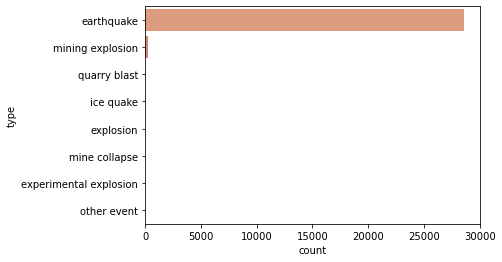

In [107]:
sns.countplot(y = "type", data = e, palette="flare")

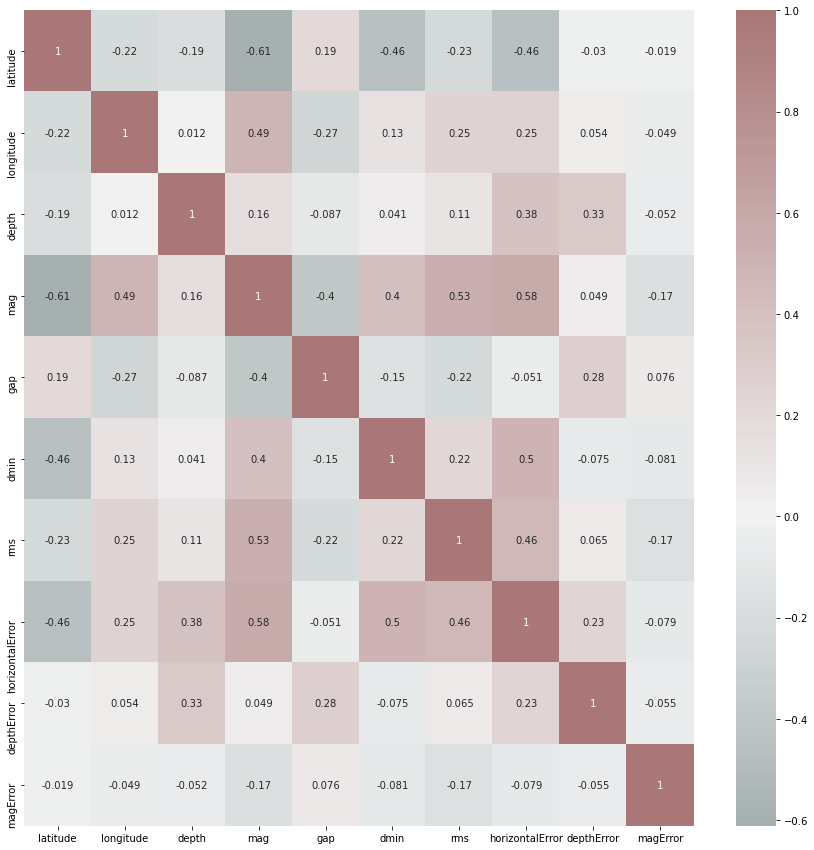

In [108]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(200,11,s=20,l=55,n=9,as_cmap=True)
sns.heatmap(e.corr(), annot=True, cmap=cmap, center=0)
plt.show()

<AxesSubplot:xlabel='depth', ylabel='magType'>

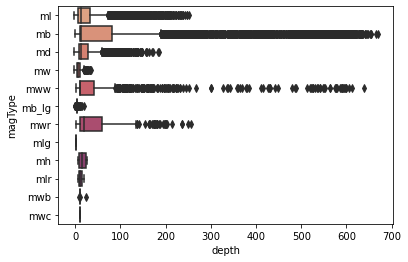

In [109]:
sns.boxplot(x = e["depth"], y = e['magType'], palette="flare" )

<font color="pink">magTypes => The method or algorithm used to calculate the preferred magnitude for the event. Typical Values “Md”, “Ml”, “Ms”, “Mw”</font>

<AxesSubplot:xlabel='longitude', ylabel='magType'>

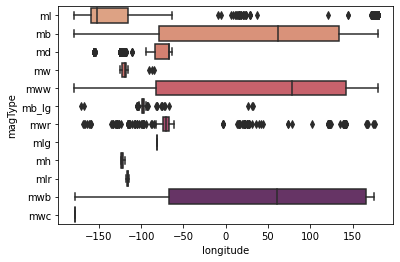

In [110]:
sns.boxplot(x = e["longitude"], y = e['magType'], palette="flare" )

In [111]:
e

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,locationSource,magSource
0,2021-12-31T23:47:57.346Z,59.809800,-153.563700,129.200000,2.50,ml,NaN,NaN,0.36,ak021gs14u6z,2022-03-05T23:11:00.040Z,"30 km E of Pedro Bay, Alaska",earthquake,NaN,0.200000,NaN,ak,ak
1,2021-12-31T23:10:35.635Z,54.631600,-163.376200,19.980000,3.40,mb,165.0,0.226000,0.96,us7000gazr,2022-03-05T23:11:13.040Z,"24 km S of False Pass, Alaska",earthquake,5.800000,8.600000,0.220000,us,us
2,2021-12-31T22:56:50.593Z,31.640247,-104.404012,6.131567,2.70,ml,64.0,0.087253,0.20,tx2021zqun,2022-03-05T23:11:00.040Z,"59 km S of Whites City, New Mexico",earthquake,1.064476,1.135905,0.100000,tx,tx
3,2021-12-31T22:41:35.180Z,20.137167,-155.803500,22.050000,2.58,ml,152.0,NaN,0.16,hv72852907,2022-03-05T23:11:00.040Z,"10 km S of Kapaau, Hawaii",earthquake,0.610000,0.850000,0.178909,hv,hv
4,2021-12-31T22:32:17.304Z,36.592200,21.423300,10.000000,4.30,mb,193.0,0.710000,0.54,us7000g88u,2022-03-05T23:11:00.040Z,"35 km SW of Meth��ni, Gr",earthquake,4.900000,2.000000,0.216000,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28867,2021-01-01T01:20:09.649Z,-31.319100,-177.934100,10.000000,5.00,mb,86.0,2.067000,0.91,us6000d4pp,2021-03-13T22:58:26.040Z,Kermadec Islands region,earthquake,8.500000,1.800000,0.100000,us,us
28868,2021-01-01T01:15:42.680Z,17.901500,-66.854000,12.000000,3.01,md,225.0,0.077800,0.11,pr2021001001,2021-03-13T22:58:25.040Z,"9 km SSE of Maria Antonia, Puerto Rico",earthquake,0.520000,0.360000,0.190000,pr,pr
28869,2021-01-01T01:13:18.272Z,13.633000,144.962100,162.730000,4.40,mb,146.0,0.100000,0.74,us6000d7q1,2021-03-13T22:59:56.040Z,"13 km NE of Yigo Village, Guam",earthquake,15.700000,3.200000,0.203000,us,us
28870,2021-01-01T00:40:35.586Z,-52.290900,-4.762200,10.000000,5.30,mww,34.0,16.126000,0.77,us6000d4p7,2021-03-13T22:58:25.040Z,southern Mid-Atlantic Ridge,earthquake,8.600000,1.700000,0.098000,us,us


In [112]:
e.drop("updated", axis = "columns")

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,id,place,type,horizontalError,depthError,magError,locationSource,magSource
0,2021-12-31T23:47:57.346Z,59.809800,-153.563700,129.200000,2.50,ml,NaN,NaN,0.36,ak021gs14u6z,"30 km E of Pedro Bay, Alaska",earthquake,NaN,0.200000,NaN,ak,ak
1,2021-12-31T23:10:35.635Z,54.631600,-163.376200,19.980000,3.40,mb,165.0,0.226000,0.96,us7000gazr,"24 km S of False Pass, Alaska",earthquake,5.800000,8.600000,0.220000,us,us
2,2021-12-31T22:56:50.593Z,31.640247,-104.404012,6.131567,2.70,ml,64.0,0.087253,0.20,tx2021zqun,"59 km S of Whites City, New Mexico",earthquake,1.064476,1.135905,0.100000,tx,tx
3,2021-12-31T22:41:35.180Z,20.137167,-155.803500,22.050000,2.58,ml,152.0,NaN,0.16,hv72852907,"10 km S of Kapaau, Hawaii",earthquake,0.610000,0.850000,0.178909,hv,hv
4,2021-12-31T22:32:17.304Z,36.592200,21.423300,10.000000,4.30,mb,193.0,0.710000,0.54,us7000g88u,"35 km SW of Meth��ni, Gr",earthquake,4.900000,2.000000,0.216000,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28867,2021-01-01T01:20:09.649Z,-31.319100,-177.934100,10.000000,5.00,mb,86.0,2.067000,0.91,us6000d4pp,Kermadec Islands region,earthquake,8.500000,1.800000,0.100000,us,us
28868,2021-01-01T01:15:42.680Z,17.901500,-66.854000,12.000000,3.01,md,225.0,0.077800,0.11,pr2021001001,"9 km SSE of Maria Antonia, Puerto Rico",earthquake,0.520000,0.360000,0.190000,pr,pr
28869,2021-01-01T01:13:18.272Z,13.633000,144.962100,162.730000,4.40,mb,146.0,0.100000,0.74,us6000d7q1,"13 km NE of Yigo Village, Guam",earthquake,15.700000,3.200000,0.203000,us,us
28870,2021-01-01T00:40:35.586Z,-52.290900,-4.762200,10.000000,5.30,mww,34.0,16.126000,0.77,us6000d4p7,southern Mid-Atlantic Ridge,earthquake,8.600000,1.700000,0.098000,us,us


In [113]:
e.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap',
       'dmin', 'rms', 'id', 'updated', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'locationSource', 'magSource'],
      dtype='object')

In [114]:
e = e[['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin',
       'rms', 'updated', 'type', 'horizontalError', 'depthError', 'magError',
       'locationSource', 'magSource', 'magType']]

<AxesSubplot:xlabel='mag', ylabel='magType'>

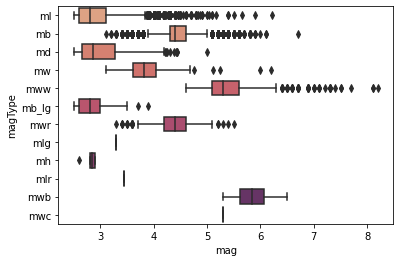

In [115]:
sns.boxplot(x = e["mag"], y = e['magType'], palette="flare" )

<AxesSubplot:xlabel='latitude', ylabel='magType'>

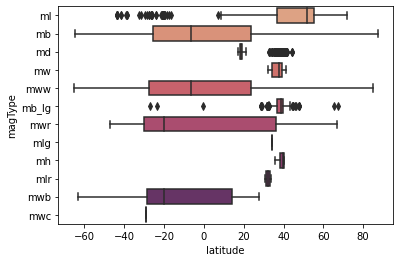

In [116]:
sns.boxplot(x = e["latitude"], y = e['magType'], palette="flare" )

<AxesSubplot:xlabel='gap', ylabel='magType'>

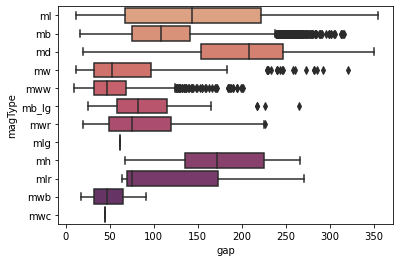

In [117]:
sns.boxplot(x = e["gap"], y = e['magType'], palette="flare" )

<AxesSubplot:xlabel='magError', ylabel='magType'>

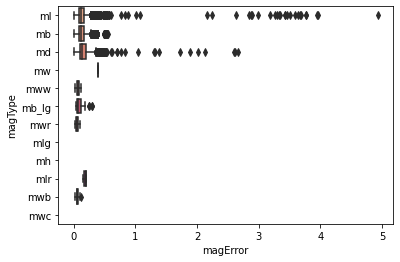

In [118]:
sns.boxplot(x = e["magError"], y = e['magType'], palette="flare" )

In [119]:
e = e.drop("updated", axis="columns")

In [120]:
e=e.drop('locationSource', axis="columns")

In [121]:
e=e.drop('type', axis="columns")

In [122]:
e=pd.get_dummies(data=e,columns=["magSource"],drop_first=True)
e.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magType', 'magSource_av',
       'magSource_ci', 'magSource_ew', 'magSource_gcmt', 'magSource_guc',
       'magSource_hv', 'magSource_mb', 'magSource_nc', 'magSource_nm',
       'magSource_nn', 'magSource_ok', 'magSource_pgc', 'magSource_pr',
       'magSource_se', 'magSource_slm', 'magSource_tx', 'magSource_us',
       'magSource_uu', 'magSource_uw', 'magSource_zamg'],
      dtype='object')

In [123]:
e=e[['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magSource_av',
       'magSource_ci', 'magSource_ew', 'magSource_gcmt', 'magSource_guc',
       'magSource_hv', 'magSource_mb', 'magSource_nc', 'magSource_nm',
       'magSource_nn', 'magSource_ok', 'magSource_pgc', 'magSource_pr',
       'magSource_se', 'magSource_slm', 'magSource_tx', 'magSource_us',
       'magSource_uu', 'magSource_uw', 'magSource_zamg', 'magType']]

In [126]:
e=e.dropna() #dropping NaN

In [132]:
array = e.values
random.shuffle(array)
random.shuffle(array)
X = array[:,0:30]
Y = array[:,30]

validation_size = 0.1
seed = 101
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [133]:
mod = DecisionTreeClassifier() 
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)
pred

array(['ml', 'mb', 'ml', ..., 'ml', 'ml', 'mb'], dtype=object)

In [134]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

          mb       1.00      1.00      1.00      1578
       mb_lg       1.00      0.94      0.97        17
          md       0.99      1.00      1.00       281
          ml       1.00      1.00      1.00       478
         mwr       0.85      0.93      0.89        30
         mww       0.98      0.98      0.98       134

    accuracy                           0.99      2518
   macro avg       0.97      0.97      0.97      2518
weighted avg       0.99      0.99      0.99      2518



In [135]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

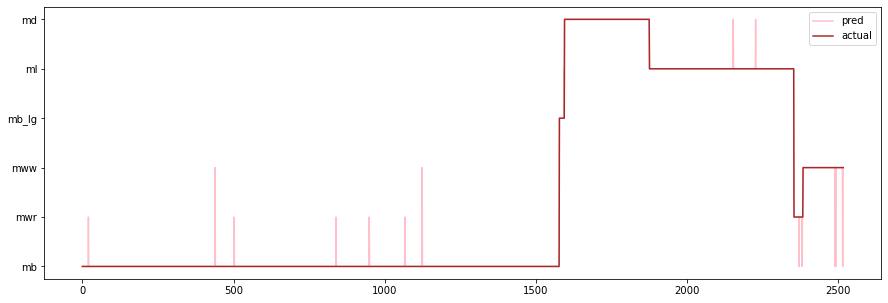

In [136]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="pink")
plt.plot(preds['y_test'], label='actual', color="brown")
plt.legend()
plt.show()